In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import preprocess
file_name = "/global/cfs/projectdirs/m3443/data/ForHadronic/train_data/pimode/hadron_pi_mode.root"
tree_name = "output"
out_branch_names = ["particle_id", "particle_E", "particle_px", "particle_py", "particle_pz"]
in_branch_names = ['incoming']
preprocess.read_data_root_hadronic(file_name, tree_name, out_branch_names, 
                                                                 in_branch_names=in_branch_names, test_frac=0.01, val_frac=0.01)

KeyboardInterrupt: 

In [2]:
from hadronic_display import Display

projectDir = '/global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow' 
# check points
mpath = projectDir+'/trained_results/train_out/pi_mode_20_bijectors'
# config, know previous configs were
cpath = projectDir+'/gan4hep/nf/config_nf_hadronic.yml'
# data path
dpath = '/global/cfs/cdirs/m3443/data/ForHadronic/train_data/wtanh/data_tanh_shifted.hkl'

hadron_e_display = Display(mpath, cpath, dpath, max_epochs=1200, epoch=499)

# original comparison file
# /global/homes/c/curtis/code/normalizing-flow/gan4hep/nf/hadronic/hadronic_display.root
# print("Starting to load comparison")
# hadron_e_display.load_comparison()

hickle_path = "/global/cfs/projectdirs/m3443/data/ForHadronic/train_data/pi_test9.hkl"
hadron_e_display.make_graphs_from_hickle(hickle_path, particle_num=2)

Loading latest checkpoint from: /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/trained_results/train_out/pi_mode_20_bijectors/checkpoints
Loaded checkpoint from /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/trained_results/train_out/pi_mode_20_bijectors/checkpoints/ckpt-499
Saved to:  /global/u2/c/curtis/code/clean/ForHadronic/normalizing-flow/gan4hep/nf/hickle_output


In [5]:
import os
p = os.path.abspath("./sample")
os.makedirs("./sample", exist_ok=True)

How does the hickle file look like?

In [2]:
import hickle as hkl
import pandas as pd
import numpy as np
import preprocess

saved = dict(hkl.load("/global/cfs/projectdirs/m3443/data/ForHadronic/train_data/pimode/pimode.hkl"))
data = saved['data']
scale = saved['scale']
label = saved['label']
partdict = saved['particle_dictionary']

# train_in, train_truth, _, _, _, _ = data
# in_branch_names, out_branch_names, data_branch_names = label
# cols = out_branch_names + in_branch_names + data_branch_names
# scale = scale

# print(train_in.shape)
# print(train_truth.shape)
# print(scale)
# print(label)
# print(partdict)

# scale_max, scale_min = scale

# TRUTH 
# truth_vectors = np.concatenate((etv_id[:, None], truth_e[:, None], truth_vectors_momentum), axis=1)
# shape is (event id, Energy, px, py, pz)
# truth_e = pscale(truth_e, scale_max, 0)

# truth_e = train_truth[]
# truth_e = preprocess.unscale(truth_e, scale_max, 0)


# maybe 


(73042642, 5)
(73042642, 5)
[ 44048.12561035 -13048.12561035]
(['incoming'], ['particle_id', 'particle_E', 'particle_px', 'particle_py', 'particle_pz'], [])
{-3334.0: 0.0, -3322.0: 1.0, -3312.0: 2.0, -3222.0: 3.0, -3212.0: 4.0, -3122.0: 5.0, -3112.0: 6.0, -2212.0: 7.0, -2112.0: 8.0, -321.0: 9.0, -211.0: 10.0, 22.0: 11.0, 111.0: 12.0, 130.0: 13.0, 211.0: 14.0, 221.0: 15.0, 310.0: 16.0, 321.0: 17.0, 331.0: 18.0, 2112.0: 19.0, 2212.0: 20.0, 3112.0: 21.0, 3122.0: 22.0, 3212.0: 23.0, 3222.0: 24.0, 3312.0: 25.0, 3322.0: 26.0, 3334.0: 27.0, 1000010048.0: 28.0, 1000020032.0: 29.0, 1000020096.0: 30.0, 1000030016.0: 31.0, 1000030080.0: 32.0, 1000040064.0: 33.0, 1000040128.0: 34.0, 1000050048.0: 35.0, 1000050112.0: 36.0, 1000060096.0: 37.0, 1000070144.0: 38.0}


array([[-2.82048462e-01, -2.60934923e-01,  1.47091816e-01,
         2.83832709e-01,  1.85320129e-01],
       [-4.87174615e-01, -9.89195542e-01, -1.97933634e-03,
        -4.75137613e-04, -3.86611412e-03],
       [ 2.56407692e-02, -9.54210768e-01, -3.88247845e-04,
         4.61270889e-03,  6.98429669e-03],
       ...,
       [-2.82048462e-01, -6.28916605e-01,  1.05690892e-01,
         1.39705737e-01,  6.10374590e-02],
       [ 4.87174615e-01, -8.69191978e-01,  9.67651136e-03,
         7.09665907e-03,  8.25329977e-03],
       [-2.56407692e-02, -9.42902937e-01, -1.64138854e-02,
        -6.97719601e-03, -6.45432178e-03]])

In [1]:


import uproot
import pandas as pd
import numpy as np
import tensorflow as tf

f = "/global/cfs/projectdirs/m3443/data/ForHadronic/train_data/pimode/hadron_pi_mode.root"
branch_names = ["particle_id", "particle_E", "particle_px", "particle_py", "particle_pz"] + ["incoming"]
dfs = []
in_file = uproot.open(f)
tree = in_file["output"]
array_root = tree.arrays(branch_names, library="np")
df_root = pd.DataFrame(array_root)
dfs += [df_root]

df = pd.concat(dfs)

cond_vectors = np.array([np.asarray(a) for a in df["incoming"].values])
true_p_counts = np.array([len(a) for a in df["particle_E"]])
print(cond_vectors)
print(true_p_counts)

df["incoming"].values = cond_vectors
df["particle_E"] = true_p_counts

df

[[31000.         28334.24804688 12024.1640625   8471.28710938]
 [31000.         18844.73632812 20607.9140625  15471.35058594]
 [31000.         25518.06640625  4718.94042969 18593.890625  ]
 ...
 [31000.          5300.15136719 22586.65625    21929.984375  ]
 [31000.         22352.28320312  3112.49584961 22580.09375   ]
 [31000.         18074.1875     25213.76171875  7534.10986328]]
[14 16 20 ... 23 23 24]


,particle_id,particle_E,particle_px,particle_py,particle_pz,incoming
0,"[211.0, -211.0, 2212.0, 2112.0, 211.0, 111.0, ...",14,"[747.8659057617188, 572.5938110351562, 111.197...","[327.887939453125, 262.717529296875, -264.5087...","[50.74557113647461, -146.4646453857422, -113.5...",31000.0
1,"[-211.0, 211.0, 2112.0, 211.0, -211.0, 2112.0,...",16,"[3432.970703125, 654.1198120117188, 959.524963...","[4197.08935546875, 1136.324462890625, 367.7626...","[3919.207763671875, 638.8335571289062, 328.673...",31000.0
2,"[-211.0, 211.0, 2212.0, -211.0, 111.0, 2112.0,...",20,"[1032.96142578125, 569.2941284179688, 4955.684...","[133.66824340820312, 372.1673583984375, 1939.3...","[1210.409423828125, 513.2843627929688, 3750.51...",31000.0
3,"[-211.0, 211.0, -211.0, 221.0, 2212.0, 111.0, ...",17,"[4.446780204772949, 101.55689239501953, 733.63...","[163.7340545654297, 368.9294738769531, 1553.61...","[145.71730041503906, 299.7763671875, 941.32482...",31000.0
4,"[-211.0, 211.0, 2112.0, 211.0, 2112.0, 2212.0,...",19,"[784.6107177734375, 1405.382080078125, 1966.07...","[984.4366455078125, 1517.6474609375, 2309.2644...","[429.6544494628906, -590.6134033203125, 388.17...",31000.0
...,...,...,...,...,...,...
4999995,"[-211.0, 211.0, 2212.0, 130.0, 211.0, 111.0, 2...",22,"[358.100341796875, 351.8626403808594, 1208.197...","[658.769287109375, 377.5389709472656, 1049.125...","[635.2437744140625, 249.9803466796875, 1357.63...",31000.0
4999996,"[211.0, -211.0, 211.0, 2212.0, 111.0, -211.0, ...",22,"[297.2841796875, 402.6824035644531, 174.126907...","[96.9198226928711, 220.05276489257812, -209.38...","[190.2758331298828, 144.76382446289062, -202.8...",31000.0
4999997,"[-211.0, 211.0, -211.0, 111.0, 2112.0, 2212.0,...",23,"[17.81800079345703, 81.8419189453125, 93.90907...","[694.0865478515625, 410.049560546875, 208.4173...","[745.700927734375, 701.7203369140625, 179.3379...",31000.0
4999998,"[-211.0, 211.0, 2112.0, 2212.0, 111.0, 2212.0,...",23,"[3049.896240234375, 738.0166015625, 241.555694...","[435.0964050292969, 889.7916870117188, -121.39...","[2901.58154296875, 1553.7327880859375, -586.64...",31000.0


For me it creates limited memory. about 11 GiB so 5 million events is unrealistic. However, I think it creates it dynamically. It dynamically allocates RAM among the users which is why Allen is sometimes able to run it. This process should take ~3 min for 5 million events and ~1.5 min for 1 million events.

In [4]:
print("Starting to generate events")
events, counts, g_in = hadron_e_display.generate_events(2000000, projectDir+"/out_nf")

Starting to generate events
(2, 1999947, 5)
(3, 1998922, 5)
(4, 1997611, 5)
(5, 1996042, 5)
(6, 1994163, 5)
(7, 1991433, 5)
(8, 1987096, 5)
(9, 1980084, 5)
(10, 1969266, 5)
(11, 1953733, 5)
(12, 1931578, 5)
(13, 1899529, 5)
(14, 1851515, 5)
(15, 1779365, 5)
(16, 1674766, 5)
(17, 1530641, 5)
(18, 1348865, 5)
(19, 1137554, 5)
(20, 911389, 5)
(21, 690088, 5)
(22, 491726, 5)
(23, 330273, 5)
(24, 209525, 5)
(25, 125564, 5)
(26, 71589, 5)
(27, 38003, 5)
(28, 19158, 5)
(29, 9133, 5)
(30, 3883, 5)
(31, 1618, 5)
(32, 577, 5)
(33, 186, 5)
(34, 56, 5)
(35, 14, 5)
(36, 2, 5)
(37, 0, 5)


In [ ]:
events, counts, g_in = hadron_e_display.load_gen(projectDir+"/out_nf")

In [5]:
hadron_e_display.make_graphs(projectDir+"/hadronic_leading_particles", events, counts, particle_num=0, scale_by_target=True)

Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_leading_particles


In [6]:
hadron_e_display.make_graphs(projectDir+"/hadronic_1", events, counts, particle_num=1, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_2", events, counts, particle_num=2, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_3", events, counts, particle_num=3, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_4", events, counts, particle_num=4, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_5", events, counts, particle_num=5, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_6", events, counts, particle_num=6, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_7", events, counts, particle_num=7, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_8", events, counts, particle_num=8, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_9", events, counts, particle_num=9, scale_by_target=True)
hadron_e_display.make_graphs(projectDir+"/hadronic_10", events, counts, particle_num=10, scale_by_target=True)

Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_1
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_2
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_3
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_4
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_5
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_6
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_7
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_8
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_9
Saved to:  /global/homes/c/curtis/code/clean/ForHadronic/normalizing-flow/hadronic_10


### Wassterstein distances / Loss

In [10]:
from utils_plot_recurrent import plot_logfile

filename = projectDir+'/trained_results/train_out/pi_mode_20_bijectors/logs/results.txt'
plot_logfile(filename, 499, projectDir+"/trained_results/train_out/pi_mode_20_bijectors/imgs/", use_val=True, logy=True, cutoff=150)

In [ ]:

# plot validation loss
plot_logfile(filename, use_val=True)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cutoff=0 # which columns
logy=None
filename = "/global/homes/c/curtis/code/normalizing-flow/train_out/pi_mode_20_bijectors/logs/results.txt"

<AxesSubplot:xlabel='epoch', ylabel='Training Loss vs Validation Loss'>

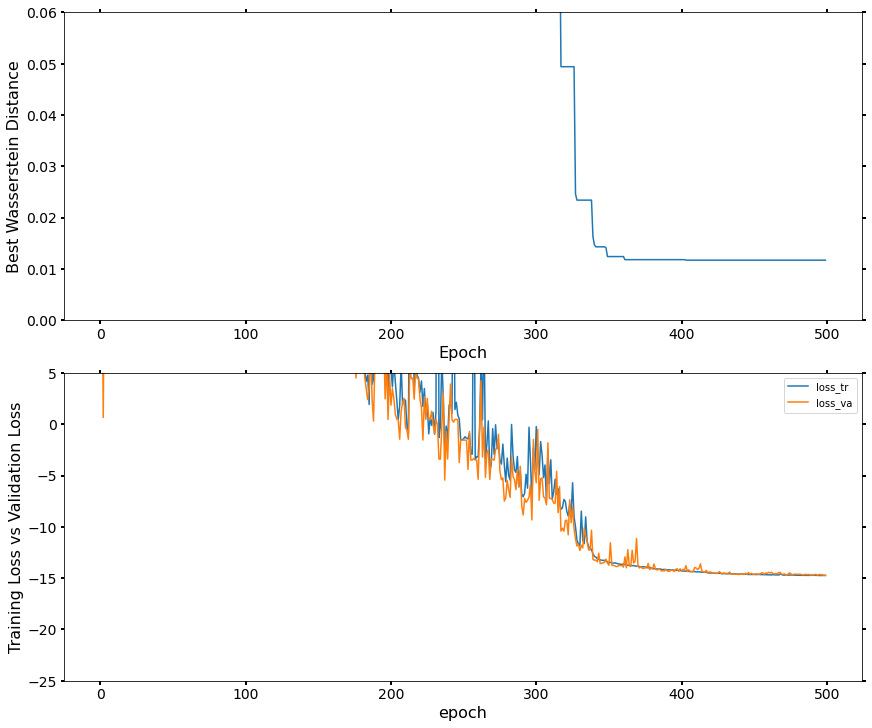

In [18]:
df = pd.read_csv(filename)
df.columns = ['epoch', 'time', 'wass_dist', 'loss_tr', 'loss_te', 'loss_va']
df = df[df['epoch'].str.contains(r'\*')]
if len(df) == 0:
	exit(0)
df = df[cutoff:]

df['epoch'] = df['epoch'].apply(lambda x: x[2:])
df = df.reset_index(drop = True).astype('float64')

# plot best Wasserstein distance so far across epochs
wass_dist_best = []
best_so_far = np.inf
for wd in df['wass_dist']:
	if wd < best_so_far:
		best_so_far = wd
	wass_dist_best.append(best_so_far)
df['wass_dist'] = wass_dist_best

# time = []
# total = 0
# run_total = 0
# for t in df['time']:
# 	if t < run_total:
# 		total += run_total
# 	run_total = t
# 	time.append(t + total)
# df['time'] = time

fig, axs = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
axs = axs.flatten()

fontsize = 16
minor_size = 14
y_labels = ['Best Wasserstein Distance', 'Training Loss vs Validation Loss']
y_data   = ['wass_dist', 'loss_tr']
x_label = 'Epoch'
x_data = 'epoch'

# PLOTS the wasserstein distance
ib = 0
values = (y_data[ib], y_labels[ib])
ax = axs[ib]

y_values = values[0]
df.plot(x=x_data, y=y_values, ax=ax, logy=logy, ylim=(0, 0.06))
ax.set_ylabel(values[1], fontsize=fontsize)
ax.set_xlabel(x_label, fontsize=fontsize)
ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size, right=True, top=True)
axs[0].get_legend().remove()


# PLOTS the training loss
ib = 1
values = (y_data[ib], y_labels[ib])

ax = axs[ib]
y_values = values[0]
df.plot(x=x_data, y=y_values, ax=ax, logy=logy, ylim=(-25, 5))
ax.set_ylabel(values[1], fontsize=fontsize)
ax.set_xlabel(x_label, fontsize=fontsize)
ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size, right=True, top=True)

ax = axs[1]
df.plot(x=x_data, y='loss_va', ax=ax, logy=logy)

In [ ]:
import hadronic_display import Display

